In [4]:
from google.colab import files
uploaded = files.upload()

Saving downsamp.csv to downsamp.csv


In [5]:
#library imports
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model
from keras.optimizers import SGD
import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['downsamp.csv']))
#data.drop(data.columns[0], axis=1)
del df['kut']
df.head()

,state,backers,usd_pledged_real,usd_goal_real,date_diff,main_category_Publishing,main_category_Film & Video,main_category_Music,main_category_Food,main_category_Design,...,country_NL,country_NZ,country_CH,country_AT,country_BE,country_DK,country_HK,country_LU,country_SG,country_JP
0,1,0.002603,0.002074,9.200000e-05,0.001951,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000123,0.000008,8.590000e-07,0.001951,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000005,0.000002,3.110000e-05,0.001951,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.000137,0.000069,1.502750e-04,0.002623,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000246,0.000068,6.010000e-05,0.001951,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#diving the dataset into test and train
trainingSet, testSet = train_test_split(df, test_size=0.2)
trainingSet.shape
testSet.shape
train_y = trainingSet[['state']].copy()
train_x = trainingSet.drop('state', 1)
test_y = testSet[['state']].copy()
test_x = testSet.drop('state', 1)
train_y = keras.utils.to_categorical(train_y, num_classes=4, dtype='int32')
test_y = keras.utils.to_categorical(test_y, num_classes=4, dtype='int32')
test_x.shape

#this is used 
#from sklearn.model_selection import train_test_split
# Split the data
#x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.33, shuffle= True)

(7461, 41)

Train on 26856 samples, validate on 2985 samples
Epoch 1/100
26856/26856 [==============================] - 2s 57us/step - loss: 1.0094 - acc: 0.5287 - val_loss: 0.9580 - val_acc: 0.5380
Epoch 2/100
26856/26856 [==============================] - 1s 42us/step - loss: 0.9658 - acc: 0.5345 - val_loss: 0.9385 - val_acc: 0.5558
Epoch 3/100
26856/26856 [==============================] - 1s 42us/step - loss: 0.9500 - acc: 0.5509 - val_loss: 0.9341 - val_acc: 0.5655
Epoch 4/100
26856/26856 [==============================] - 1s 43us/step - loss: 0.9443 - acc: 0.5574 - val_loss: 0.9342 - val_acc: 0.5534
Epoch 5/100
26856/26856 [==============================] - 1s 42us/step - loss: 0.9407 - acc: 0.5623 - val_loss: 0.9237 - val_acc: 0.5652
Epoch 6/100
26856/26856 [==============================] - 1s 42us/step - loss: 0.9342 - acc: 0.5689 - val_loss: 0.9136 - val_acc: 0.5719
Epoch 7/100
26856/26856 [==============================] - 1s 42us/step - loss: 0.9210 - acc: 0.5831 - val_loss: 0.8897 - v

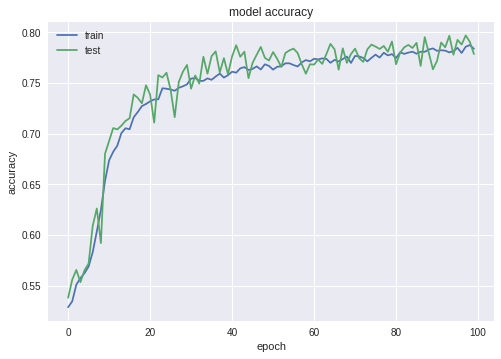

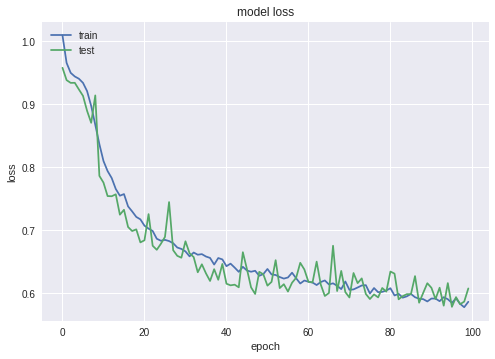

29841/29841 [==============================] - 1s 25us/step


(7461, 4)

In [10]:
#Building Artifcial Nerual Network
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(264, activation='relu', kernel_initializer='random_normal', input_dim=41))
#Second  Hidden Layer
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
#third  Hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
#Second  Hidden Layer
classifier.add(Dense(18, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(4, activation='softmax', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer = 'adam',
                   loss='categorical_crossentropy',
                   metrics =['accuracy'])

#Fitting the data to the training dataset
history = classifier.fit(train_x,train_y, batch_size=64, epochs=100, validation_split=0.1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

eval_model=classifier.evaluate(train_x,train_y)
eval_model

y_pred=classifier.predict(test_x)
y_pred =(y_pred>0.5)

#evaluateion
y_pred.shape

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(test_y, y_pred)
#rint(cm)

In [9]:
#Implementing Artifcial Neural Network
#Drawaing confusion matrix
y_test_non_category = [ np.argmax(t) for t in test_y]# transoforming from multiple column output to single column
y_predict_non_category = [ np.argmax(t) for t in y_pred]# same as above

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
conf_mat

array([[3716,  243,    1,    2],
       [ 526, 2093,    0,    2],
       [  50,   11,    0,    0],
       [ 773,   42,    0,    2]])

In [11]:
from IPython.display import Image
Image('model_plot.png')
plot_model(classifier)
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 264)               11088     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               26500     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_9 (Dense)              (None, 18)                378       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 76        
Total params: 40,062
Trainable params: 40,062
Non-trainable params: 0
_________________________________________________________________
None
